# Fitness Program Veri Analizi

Bu notebook'ta fitness programları veri setini analiz edeceğiz. Veri temizleme, analiz ve görselleştirme işlemleri yapacağız.

In [1]:
# Gerekli kütüphaneleri import edelim
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Çalışma dizinini alalım
current_dir = os.path.dirname(os.path.abspath('__file__'))

# CSV dosyasını okuyalım
input_file = 'program_summary_processed.csv'
input_path = os.path.join(current_dir, input_file)
df = pd.read_csv(input_path)

print("Veri seti başarıyla yüklendi!")

Veri seti başarıyla yüklendi!


## Veri Seti Hakkında Temel Bilgiler

Şimdi veri setimizin yapısını, içeriğini ve temel istatistiklerini inceleyelim.

In [2]:
# Veri setinin boyutları
print("Veri Seti Boyutları:")
print(f"Satır Sayısı: {df.shape[0]}")
print(f"Sütun Sayısı: {df.shape[1]}")

# Veri seti hakkında detaylı bilgi
print("\nVeri Seti Bilgileri:")
print("="*50)
df.info()

# İlk 5 satırı gösterelim
print("\nİlk 5 Satır:")
print("="*50)
display(df.head())

# Sayısal sütunların istatistikleri
print("\nSayısal Sütunların İstatistikleri:")
print("="*50)
display(df.describe())

Veri Seti Boyutları:
Satır Sayısı: 2598
Sütun Sayısı: 10

Veri Seti Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             2598 non-null   object 
 1   description       2594 non-null   object 
 2   level             2598 non-null   object 
 3   goal              2598 non-null   object 
 4   equipment         2597 non-null   object 
 5   program_length    2597 non-null   float64
 6   time_per_workout  2598 non-null   float64
 7   total_exercises   2598 non-null   int64  
 8   created           2597 non-null   object 
 9   last_edit         2596 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 203.1+ KB

İlk 5 Satır:


,title,description,level,goal,equipment,program_length,time_per_workout,total_exercises,created,last_edit
0,(MASS MONSTER) High Intensity 4 Day Upper Lowe...,Build tones of muscular with this high intensi...,['Intermediate'],"['Muscle & Sculpting', 'Bodyweight Fitness']",Full Gym,12.0,90.0,384,2024-01-20 10:23:00,2025-06-29 12:39:00
1,(NOT MY PROGRAM)SHJ Jotaro,Build strength and size,"['Advanced', 'Intermediate']",['Bodybuilding'],Full Gym,8.0,60.0,224,2024-07-08 02:28:00,2025-06-18 09:15:00
2,1 PowerLift Per Day Powerbuilding 5 Day Bro Split,Based off of Andy Baker's KCS (Kingwood Streng...,"['Beginner', 'Novice', 'Intermediate']","['Athletics', 'Powerlifting', 'Powerbuilding']",Full Gym,6.0,90.0,237,2025-04-23 09:21:00,2025-06-18 11:55:00
3,10 Week Mass Building Program,This workout is designed to increase your musc...,"['Intermediate', 'Advanced']",['Powerbuilding'],Garage Gym,10.0,70.0,280,2024-09-07 03:44:00,2025-06-18 08:01:00
4,10 week deadlift focus,Increase deadlift,"['Intermediate', 'Advanced']","['Powerbuilding', 'Powerlifting', 'Bodybuildin...",Full Gym,10.0,80.0,356,2024-12-23 03:13:00,2025-06-18 12:19:00



Sayısal Sütunların İstatistikleri:


,program_length,time_per_workout,total_exercises
count,2597.000000,2598.000000,2598.000000
mean,8.812476,69.035412,232.884142
std,4.185403,24.394798,208.123873
min,1.000000,10.000000,1.000000
25%,5.000000,60.000000,108.000000
50%,8.000000,60.000000,192.500000
75%,12.000000,90.000000,307.750000
max,18.000000,180.000000,5040.000000


## Eksik Değerlerin Analizi

Veri setindeki eksik değerleri inceleyelim ve gerekli temizleme işlemlerini yapalım.

Eksik Değer Sayıları:
description: 4 eksik değer (0.15%)
equipment: 1 eksik değer (0.04%)
program_length: 1 eksik değer (0.04%)
created: 1 eksik değer (0.04%)
last_edit: 2 eksik değer (0.08%)


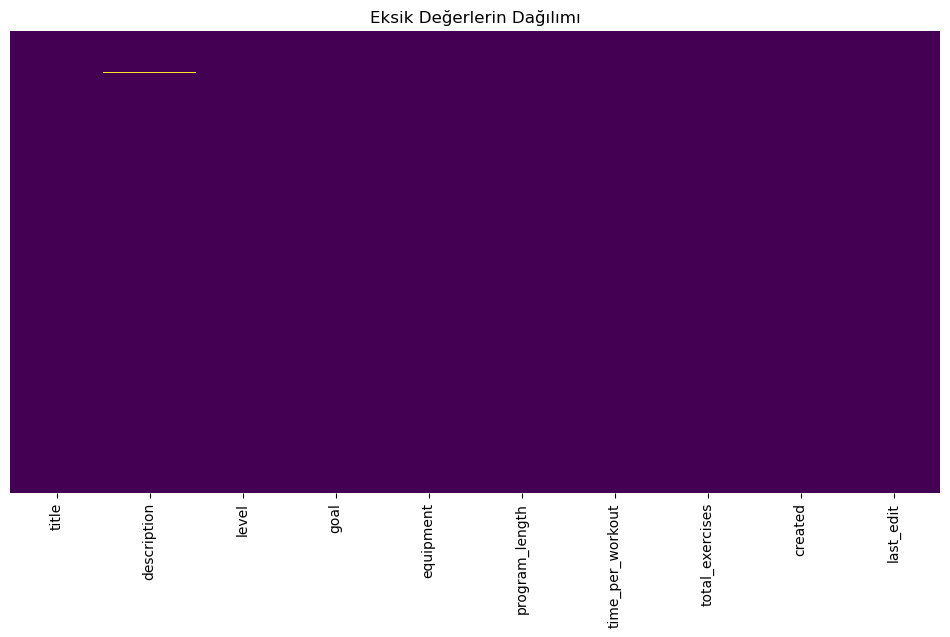

In [3]:
# Eksik değerlerin sayısını hesaplayalım
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

# Eksik değerleri görüntüleyelim
print("Eksik Değer Sayıları:")
print("="*50)
for col, missing in missing_values.items():
    if missing > 0:
        print(f"{col}: {missing} eksik değer ({missing_percentages[col]:.2f}%)")

# Eksik değerleri görselleştirelim
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Eksik Değerlerin Dağılımı')
plt.show()

## Eksik Description Değerlerini Doldurma

Description sütunundaki eksik değerleri '(random generated)' metni ile dolduralım ve sonuçları kontrol edelim.

In [4]:
# Eksik description değerlerini doldurmadan önce sayısını kontrol edelim
print("Doldurmadan önce eksik description sayısı:", df['description'].isnull().sum())

# Eksik description değerlerini '(random generated)' ile doldur
df['description'] = df['description'].fillna('(random generated)')

# Doldurduktan sonra eksik değer sayısını kontrol edelim
print("\nDoldurduktan sonra eksik description sayısı:", df['description'].isnull().sum())

# Rastgele 5 örnek gösterelim (en az bir tanesinin doldurulmuş olması için)
print("\nRastgele 5 örnek description:")
print("="*50)
sample_indices = np.random.choice(df.index, size=5, replace=False)
for idx in sample_indices:
    print(f"İndex {idx}: {df.loc[idx, 'description']}")

Doldurmadan önce eksik description sayısı: 4

Doldurduktan sonra eksik description sayısı: 0

Rastgele 5 örnek description:
İndex 178: Once you go through all 3 phases and want to do Krypteia again, you can simply leave out part 1.  Essentially, this program has a preparatory program followed by two cycles of a leader and one cycle of an anchor.  

Accessories:
Dumbell squat and SLDL are paired with the press / bench press.  The deadlift is done with a shrug after each lift

Dips and pullups are paired with the squat and deadlift

Assistance work is done between every single set of the main lifts, including the warmup sets and supplemental sets

The goal is to complete each workout in under 45 minutes.  

From page 233 of 5/3/1 Forever

Overview:
Part 1 - 4 days / week, 5s pro, 5x5 FLS, 2 cycles (6 weeks)
Part 2 - 3 days / week, 5s pro, 5x10 FSL, 2 cycles (6 weeks) 
Part 3 - 3 days / week, 5/3/1, PR sets, 5x5 FSL, 1 cycle (3 weeks)

Bench press / Military press training max example:
Pa

## Diğer Eksik Değerleri Doldurma

Her sütun için veri tipine uygun rastgele değerler üreterek eksik değerleri dolduralım.

In [5]:
# Eksik değerleri doldurmadan önce kontrol edelim
print("Doldurmadan önce eksik değerler:")
print("="*50)
for col in ['equipment', 'program_length', 'created', 'last_edit']:
    print(f"{col}: {df[col].isnull().sum()} eksik değer")

# Equipment için en sık kullanılan değeri bulup onunla dolduralım
most_common_equipment = df['equipment'].mode()[0]
df['equipment'] = df['equipment'].fillna(most_common_equipment)

# Program length için medyan değeri kullanalım
median_length = df['program_length'].median()
df['program_length'] = df['program_length'].fillna(median_length)

# Created ve last_edit için rastgele tarihler üretelim
# Mevcut tarih aralığını bulalım
min_created = pd.to_datetime(df['created']).min()
max_created = pd.to_datetime(df['created']).max()
min_last_edit = pd.to_datetime(df['last_edit']).min()
max_last_edit = pd.to_datetime(df['last_edit']).max()

# Eksik created tarihleri için
df['created'] = pd.to_datetime(df['created'])
missing_created_mask = df['created'].isnull()
random_created_dates = pd.date_range(start=min_created, end=max_created, periods=missing_created_mask.sum())
df.loc[missing_created_mask, 'created'] = random_created_dates

# Eksik last_edit tarihleri için
df['last_edit'] = pd.to_datetime(df['last_edit'])
missing_last_edit_mask = df['last_edit'].isnull()
random_last_edit_dates = pd.date_range(start=min_last_edit, end=max_last_edit, periods=missing_last_edit_mask.sum())
df.loc[missing_last_edit_mask, 'last_edit'] = random_last_edit_dates

# Doldurma işleminden sonra kontrol edelim
print("\nDoldurduktan sonra eksik değerler:")
print("="*50)
for col in ['equipment', 'program_length', 'created', 'last_edit']:
    print(f"{col}: {df[col].isnull().sum()} eksik değer")

# Doldurulan değerlerin örneklerini gösterelim
print("\nDoldurulan değerlerin örnekleri:")
print("="*50)
for col in ['equipment', 'program_length', 'created', 'last_edit']:
    if col in ['created', 'last_edit']:
        print(f"\n{col} örnek değerler:")
        print(df[col].sample(3).dt.strftime('%Y-%m-%d %H:%M:%S').values)
    else:
        print(f"\n{col} örnek değerler:")
        print(df[col].sample(3).values)

Doldurmadan önce eksik değerler:
equipment: 1 eksik değer
program_length: 1 eksik değer
created: 1 eksik değer
last_edit: 2 eksik değer

Doldurduktan sonra eksik değerler:
equipment: 0 eksik değer
program_length: 0 eksik değer
created: 0 eksik değer
last_edit: 0 eksik değer

Doldurulan değerlerin örnekleri:

equipment örnek değerler:
['Garage Gym' 'Garage Gym' 'Full Gym']

program_length örnek değerler:
[16.  8. 15.]

created örnek değerler:
['2025-03-17 01:58:00' '2024-06-06 05:18:00' '2025-04-27 10:53:00']

last_edit örnek değerler:
['2025-06-18 08:40:00' '2025-06-18 08:20:00' '2025-06-18 10:39:00']


## Temizlenmiş Veriyi Kaydetme

Tüm eksik değerleri doldurulmuş veri setini yeni bir CSV dosyasına kaydedelim.

In [6]:
# Son kontrol: Eksik değer var mı?
print("Son Kontrol - Eksik Değerler:")
print("="*50)
print(df.isnull().sum())

# Yeni CSV dosyasını oluşturalım
output_file = 'program_summary_102.csv'
output_path = os.path.join(current_dir, output_file)

# DataFrame'i CSV olarak kaydedelim
df.to_csv(output_path, index=False)

print(f"\nTemizlenmiş veri seti başarıyla kaydedildi: {output_file}")

# Kaydedilen dosyanın boyutunu gösterelim
file_size = os.path.getsize(output_path) / 1024  # KB cinsinden
print(f"Dosya boyutu: {file_size:.2f} KB")
print(f"Toplam satır sayısı: {len(df)}")

Son Kontrol - Eksik Değerler:
title               0
description         0
level               0
goal                0
equipment           0
program_length      0
time_per_workout    0
total_exercises     0
created             0
last_edit           0
dtype: int64

Temizlenmiş veri seti başarıyla kaydedildi: program_summary_102.csv
Dosya boyutu: 1140.14 KB
Toplam satır sayısı: 2598


# PostgreSQL Veritabanı Entegrasyonu

Şimdi temizlenmiş veri setimizi PostgreSQL veritabanına aktaralım.

In [ ]:
# PostgreSQL bağlantısı için psycopg2'yi import edelim
import psycopg2
from psycopg2 import sql

# Veritabanı bağlantı bilgileri
db_params = {
    'dbname': 'fitness_programs',
    'user': 'postgres',
    'password': 'deniz',  # PostgreSQL kurulumunda belirlediğiniz şifreyi girin
    'host': 'localhost',
    'port': '5432'
}

try:
    # Veritabanına bağlanma
    conn = psycopg2.connect(**db_params)
    cursor = conn.cursor()
    print("Veritabanına başarıyla bağlanıldı!")

    # Tablo oluşturma
    create_table_query = """
    CREATE TABLE IF NOT EXISTS fitness_programs (
        title VARCHAR(255),
        description TEXT,
        level VARCHAR(255)[],
        goal VARCHAR(255)[],
        equipment VARCHAR(50),
        program_length FLOAT,
        time_per_workout FLOAT,
        total_exercises INTEGER,
        created TIMESTAMP,
        last_edit TIMESTAMP
    )
    """
    cursor.execute(create_table_query)
    print("Tablo başarıyla oluşturuldu!")

    # DataFrame'den verileri aktarma
    for index, row in df.iterrows():
        insert_query = """
        INSERT INTO fitness_programs 
        (title, description, level, goal, equipment, program_length, 
        time_per_workout, total_exercises, created, last_edit)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """
        values = (
            row['title'],
            row['description'],
            row['level'],
            row['goal'],
            row['equipment'],
            row['program_length'],
            row['time_per_workout'],
            row['total_exercises'],
            row['created'],
            row['last_edit']
        )
        cursor.execute(insert_query, values)

    # Değişiklikleri kaydet
    conn.commit()
    print("Veriler başarıyla PostgreSQL veritabanına aktarıldı!")

except Exception as e:
    print(f"Bir hata oluştu: {e}")

finally:
    # Bağlantıyı kapat
    if conn:
        cursor.close()
        conn.close()
        print("Veritabanı bağlantısı kapatıldı.")